<a href="https://colab.research.google.com/github/santolina/Convolutional-Neural-Networks-in-TensorFlow/blob/master/Exercise_3_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [1]:
import tensorflow as tf

# YOUR CODE STARTS HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.998):
      print("Reached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True    
# YOUR CODE ENDS HERE

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# YOUR CODE STARTS HERE
training_images = training_images.reshape((training_images.shape[0], training_images.shape[1], training_images.shape[2], 1)) / 255.    
callbacks = myCallback()
# YOUR CODE ENDS HERE

model = tf.keras.models.Sequential([
    # YOUR CODE STARTS HERE
            tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
            tf.keras.layers.MaxPool2D((2,2)),
            tf.keras.layers.Flatten(),
            #tf.keras.layers.Dense(512, activation='softmax')
            tf.keras.layers.Dense(10, activation='softmax')
    # YOUR CODE ENDS HERE
])

# YOUR CODE STARTS HERE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model fitting
history = model.fit(
        # YOUR CODE STARTS HERE
        training_images, training_labels, epochs=20, callbacks=[callbacks]
        # YOUR CODE ENDS HERE
    )
# YOUR CODE ENDS HERE




11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 36s 595us/sample - loss: 0.1789 - acc: 0.9497
Epoch 2/20
60000/60000 [==============================] - 35s 583us/sample - loss: 0.0691 - acc: 0.9798
Epoch 3/20
60000/60000 [==============================] - 35s 591us/sample - loss: 0.0533 - acc: 0.9842
Epoch 4/20
60000/60000 [==============================] - 35s 581us/sample - loss: 0.0438 - acc: 0.9861
Epoch 5/20
60000/60000 [==============================] - 35s 576us/sample - loss: 0.0346 - acc: 0.9895
Epoch 6/20
60000/60000 [==============================] - 35s 579us/sample - loss: 0.0282 - acc: 0.9915
Epoch 7/20
60000/60000 [==============================] - 35s 581us/sample - loss: 0.0223 - acc: 0.9932
Epoch 8/20
60000/60000 [==============================] - 35s 578us/sample - loss: 0.0184 - acc: 0.9944

In [0]:
import matplotlib.pyplot as plt

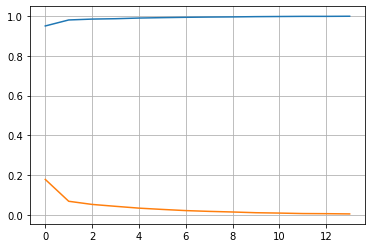

In [4]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['loss'], label='loss')
plt.grid(True)
plt.show()